In [41]:
#importing necessary libraries
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [42]:
#reading csv files
food = pd.read_csv("food.csv")
ratings = pd.read_csv("ratings.csv")


In [43]:
food.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [44]:
ratings.head()

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


In [45]:
#forming pivot table
dataset= ratings.pivot_table(index="Food_ID", columns="User_ID", values="Rating")

In [46]:
dataset.head()

User_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Food_ID,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,7.0,NaN,NaN


In [47]:
dataset.fillna(0, inplace=True)

In [48]:
#main recommendation function
def food_recommendation(Food_name):
    n=10
    List_of_foods= food[food["Name"].str.contains(Food_name)]
    if len(List_of_foods):
        Foodid= List_of_foods.iloc[0]["Food_ID"]
        Foodid= dataset[dataset["Food_ID"]==Foodid].index[0]
        distances, indices= model.kneighbors(csr_dataset[Foodid], n_neighbors=n+1)
        Food_indices= sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
        Recommendations=[]
        for val in Food_indices:
            Foodid= dataset.iloc[val[0]]["Food_ID"]
            i= food[food["Food_ID"]==Foodid].index
            Recommendations.append({"Name" :food.iloc[i]["Name"].values[0],"Distance":val[1]})
        df= pd.DataFrame(Recommendations, index= range(1,n+1))
        return df["Name"]
    else:
        return "No similar Foods:"
    
        

In [49]:
# Train the K-Means model
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(dataset.values)

# Obtain cluster labels
cluster_labels = kmeans.labels_

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
#remove sparsity
csr_dataset= csr_matrix(dataset.values)
dataset.reset_index(inplace = True)




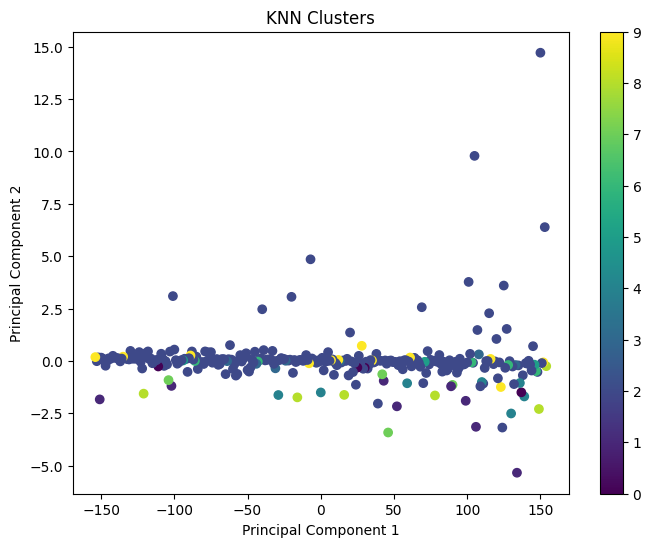

In [51]:
#using algorithm
model = NearestNeighbors(metric="cosine",algorithm="brute", n_neighbors=20, n_jobs=-1)
model.fit(csr_dataset)

# Perform PCA to reduce dataset to 2 dimensions
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset.values)

# Plot the KNN clusters
plt.figure(figsize=(8, 6))
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KNN Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [52]:
food_recommendation("cashew nut cookies")

1                andhra crab meat masala
2                     baked shankarpali 
3                peri peri chicken satay
4          almond and raw banana galawat
5     ghee roast chicken dosa quesadilla
6                   vegetable bruschetta
7                steam bunny chicken bao
8                   methi chicken masala
9                            chilli fish
10                  dates and nuts ladoo
Name: Name, dtype: object